In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import nltk



In [3]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shriraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shriraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Load dataset
dataset = pd.read_csv('C:/Users/Shriraj/Desktop/VIT ty/ANN/IMDB.csv')

In [7]:

# Fixing the warning for chained assignment
dataset['sentiment'] = dataset['sentiment'].replace({'positive': 1, 'negative': 0})


C:\Users\Shriraj\AppData\Local\Temp\ipykernel_22856\2651046905.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['sentiment'] = dataset['sentiment'].replace({'positive': 1, 'negative': 0})


In [9]:
# Data Cleaning Functions
# Remove HTML tags, special characters, convert to lowercase, remove stopwords, and stem words
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned, '', text)

def is_special(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def to_lower(text):
    return text.lower()

In [11]:
#  Remove HTML tags
dataset['cleaned_review'] = dataset['review'].apply(clean)
print("After removing HTML tags:\n", dataset['cleaned_review'].head(), "\n")


After removing HTML tags:
 0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: cleaned_review, dtype: object 



In [13]:
#  Remove special characters
dataset['cleaned_review'] = dataset['cleaned_review'].apply(is_special)
print("After removing special characters:\n", dataset['cleaned_review'].head(), "\n")


After removing special characters:
 0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: cleaned_review, dtype: object 



In [14]:
# Convert to lowercase
dataset['cleaned_review'] = dataset['cleaned_review'].apply(to_lower)
print("After converting to lowercase:\n", dataset['cleaned_review'].head(), "\n")


After converting to lowercase:
 0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: cleaned_review, dtype: object 



In [17]:
# Calculate the number of words in each review (before removing stopwords)
dataset['word_count'] = dataset['cleaned_review'].apply(lambda x: len(x.split()))

# Calculate statistics: average, min, and max word count
avg_word_count = dataset['word_count'].mean()
min_word_count = dataset['word_count'].min()
max_word_count = dataset['word_count'].max()

# Print the statistics
print(f"Average number of words per review: {round(avg_word_count)}")
print(f"Minimum number of words in a review: {min_word_count}")
print(f"Maximum number of words in a review: {max_word_count}")

Average number of words per review: 225
Minimum number of words in a review: 4
Maximum number of words in a review: 2441


In [18]:
# Print the review with the least and most words
review_with_least_words = dataset.loc[dataset['word_count'].idxmin()]['cleaned_review']
review_with_most_words = dataset.loc[dataset['word_count'].idxmax()]['cleaned_review']


In [21]:
print("\nReview with the least words:\n", review_with_least_words)


Review with the least words:
 primary plotprimary directionpoor interpretation


In [23]:
print("\nReview with the most words:\n", review_with_most_words)


Review with the most words:
 match  tag team table match bubba ray and spike dudley vs eddie guerrero and chris benoit bubba ray and spike dudley started things off with a tag team table match against eddie guerrero and chris benoit according to the rules of the match both opponents have to go through tables in order to get the win benoit and guerrero heated up early on by taking turns hammering first spike and then bubba ray a german suplex by benoit to bubba took the wind out of the dudley brother spike tried to help his brother but the referee restrained him while benoit and guerrero ganged up on him in the corner with benoit stomping away on bubba guerrero set up a table outside spike dashed into the ring and somersaulted over the top rope onto guerrero on the outside after recovering and taking care of spike guerrero slipped a table into the ring and helped the wolverine set it up the tandem then set up for a double superplex from the middle rope which would have put bubba throug

In [25]:
# Remove stopwords and stem words
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return ' '.join([w for w in words if w not in stop_words])

def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text.split()])


In [27]:
# Final text cleaning with stopwords removal and stemming
dataset['review'] = dataset['cleaned_review'].apply(rem_stopwords).apply(stem_txt)


In [29]:
# Tokenization and Padding for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataset['review'])

X = tokenizer.texts_to_sequences(dataset['review'])
X = pad_sequences(X, maxlen=250)
y = np.array(dataset['sentiment'])


In [30]:
# Train-test Split (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [59]:
# Print the sizes of the train and test sets
print(f"Train size (X_train): {X_train.shape[0]}")
print(f"Test size (X_test): {X_test.shape[0]}")

Train size (X_train): 40000
Test size (X_test): 10000


In [61]:
# LSTM Model Creation with recommended activation functions
model = Sequential()

In [ ]:
# Embedding Layer
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100)

In [65]:
# LSTM Layer with tanh activation (default for LSTM)
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))


In [67]:
# First Dense Layer with relu activation and Batch Normalization
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


In [69]:
# Second Dense Layer with relu activation and Batch Normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [71]:
# Third Dense Layer with relu activation and Batch Normalization
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

In [73]:
# Output Layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


In [75]:
# Compile the model with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])



In [77]:
# Training the LSTM Model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 192ms/step - accuracy: 0.5174 - loss: 0.8220 - val_accuracy: 0.5431 - val_loss: 0.6849
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.6364 - loss: 0.6475 - val_accuracy: 0.7987 - val_loss: 0.4327
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 196ms/step - accuracy: 0.7966 - loss: 0.4544 - val_accuracy: 0.8162 - val_loss: 0.4024
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 196ms/step - accuracy: 0.8386 - loss: 0.3816 - val_accuracy: 0.8597 - val_loss: 0.3330
Epoch 5/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.8653 - loss: 0.3356 - val_accuracy: 0.8553 - val_loss: 0.3353
Epoch 6/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 199ms/step - accuracy: 0.8711 - loss: 0.3227 - val_accuracy: 0.8665 - val_loss: 0.3184
Epoch 7/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.8826 - loss: 0.3014 - val_accuracy: 0.8655 - val_loss: 0.3260
Epoch 8/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.8886 -

In [79]:
# Save the model
model.save("Models/LSTM_movie_review_model.h5")


In [81]:
# Model Evaluation
ypred = model.predict(X_test)
ypred = (ypred > 0.5).astype(int).flatten()


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


In [83]:
# Evaluate the accuracy
print(f"LSTM accuracy = {round(accuracy_score(y_test, ypred), 2) * 100} %")


LSTM accuracy = 87.0 %


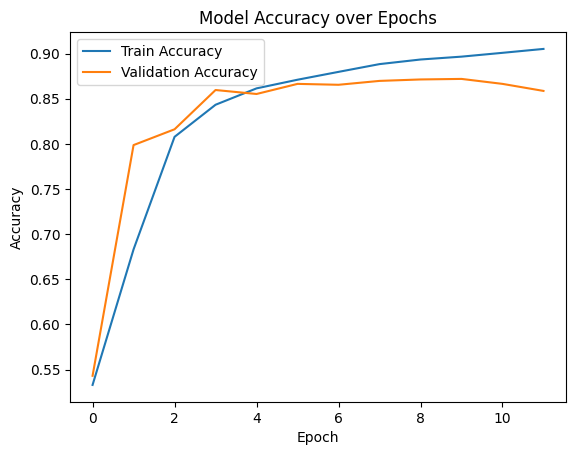

In [85]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [181]:
# Ask for user input (movie review)
user_review = input("Enter a movie review: ")

# Clean and preprocess the user review
user_review_clean = clean(user_review)
user_review_clean = is_special(user_review_clean)
user_review_clean = to_lower(user_review_clean)
user_review_clean = rem_stopwords(user_review_clean)
user_review_clean = stem_txt(user_review_clean)

# Tokenize and pad the user review
user_review_sequence = tokenizer.texts_to_sequences([user_review_clean])
user_review_padded = pad_sequences(user_review_sequence, maxlen=100)


# Load the trained model
model = load_model("Models/LSTM_movie_review_model.h5")

# Predict the sentiment of the user review
prediction = model.predict(user_review_padded)

# Output the prediction result

if prediction > 0.55:
    print("The review sentiment is Positive.")
elif (prediction >=0.45 and prediction<=0.55):
    print("The review is Neutral")
else:
    print("The review sentiment is Negative.")

#print(prediction)


Enter a movie review:  Best movie which I have seen in this 2-3 years after bahubali 2. Song are good and the story of the movie is unmatchable and too heart touching. Prabhash is my best actor and after bahubali it's become favourite actor for me and last scene of movie is too merorable. Thanks to the radhe shyam movie team to bring this lovely movie around us it must break all the records of the Indian cinema.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
The review sentiment is Positive.
